# End-to-End (Very Simple) Data Science Pipeline Example

Based on the tutorial <a href="Machine learning in the real world">"Machine learning in the real world" </a> (VLDB,2016)

## 0.1 Import Python Libraries

In [144]:
#data processing
import pandas as pd
import numpy as np

#data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Machine learning library
import sklearn

## 0.2 Reading the Income Classification Dataset

In [451]:
train_data = pd.read_csv('data/adults_train.csv')
test_data = pd.read_csv('data/adults_test.csv')

#                1.Data preparation:
### <ul> <li>Exploration (EDA) & Visualizaiton </li>   <li> Cleaning</li> <li> Wrangling & Feature Engineering </li> </ul>

## 1.1 Exploration (EDA) & Visualization

In [452]:
train_data.head()

,age,workclass,observation-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Dataset Sizes:

In [453]:
len(train_data),len(test_data)

(32561, 16281)

### Columns & Data types

In [454]:
train_data.dtypes

age                    int64
workclass             object
observation-weight     int64
education             object
education-num          int64
marital-status        object
occupation            object
relationship          object
race                  object
sex                   object
capital-gain           int64
capital-loss           int64
hours-per-week         int64
native-country        object
class                 object
dtype: object

We divide the column names to binary, categorical, and numeric

In [455]:
binary_variables = ['class']
categorical_variables = ['workclass', 'education', 'education-num', 'marital-status', 
                         'occupation', 'relationship', 'race', 'sex', 'native-country']
numeric_variables = ['hours-per-week','age','capital-gain','capital-loss']

### Class distribution

In [456]:
train_data['class'].value_counts()

 <=50K    24720
 >50K      7841
Name: class, dtype: int64

### Data Statistics

In [457]:
train_data.describe()

,age,observation-weight,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Value Histograms

Simple histogram using Pandas

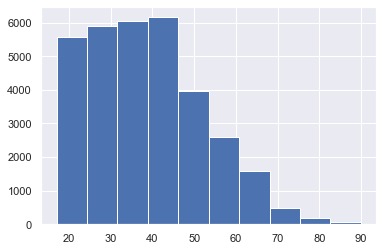

In [458]:
train_data["age"].hist()

Create multiple histograms:

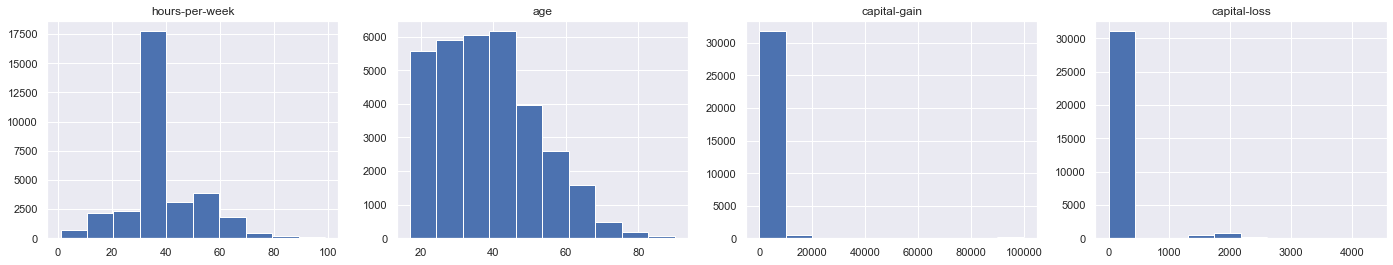

In [459]:
#initialize a Matplotlib figures grid
fig, axes = plt.subplots(1, len(numeric_variables),figsize=(24,4))

#generate a histogram using Pandas, for each numeric variable
for ind,var in enumerate(numeric_variables):
    train_data[var].hist(ax=axes[ind])
    axes[ind].set_title(var)


### Value Histograms for Categorical Variables (via Pandas and Matplotlib)

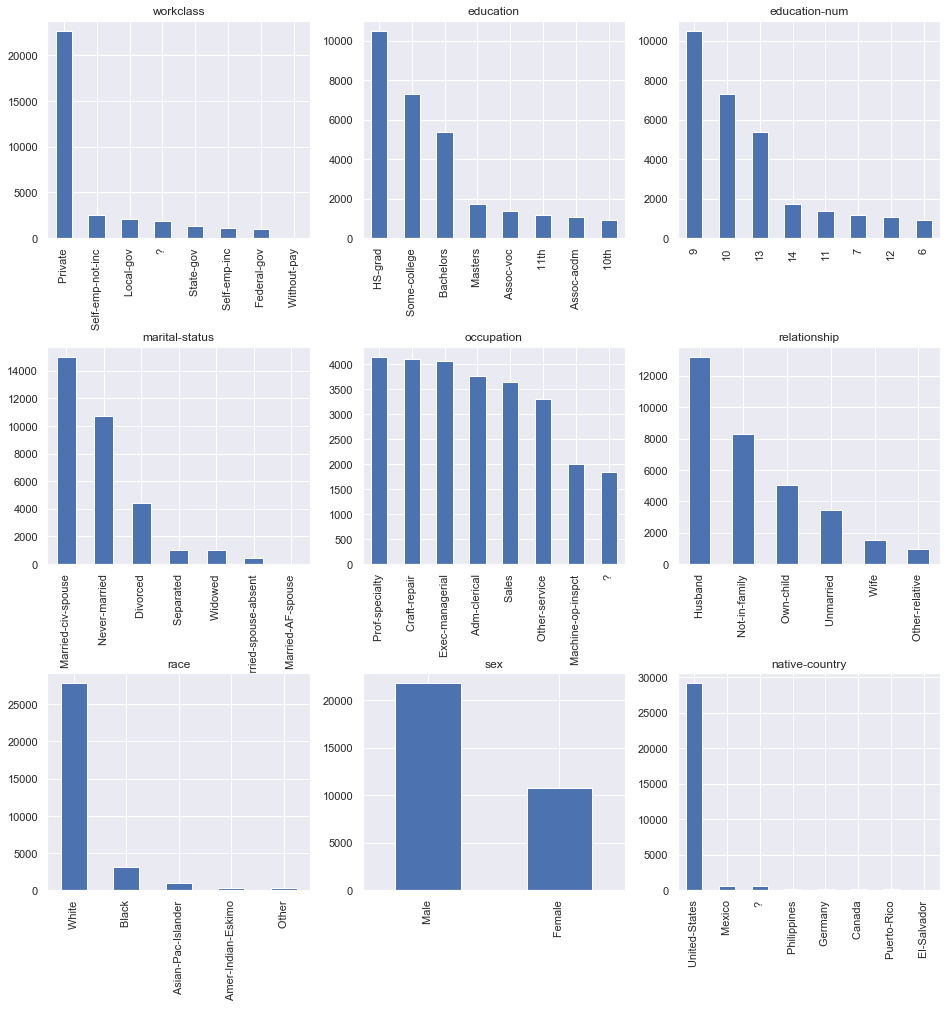

In [460]:
#generate a figures grid:
fig, axes = plt.subplots(3,3,figsize=(16,16))
fig.subplots_adjust(hspace=0.5)

#we will create a histogram for each categorical attribute
n=len(categorical_variables)
num_rows = 3
max_bars = 8

for i,variable in enumerate(categorical_variables):
    #calculate the current place on the grid
    r=int(i/num_rows)
    c=i%num_rows
    
    #create the "value counts" for the first <max_bars> categories:
    u=min(train_data[variable].nunique(),max_bars)
    vc = train_data[variable].value_counts()[:u]
    
    # plot a bar chart using Pandas
    vc.plot(kind='bar',ax=axes[r,c],title=variable)


## Comparative Visualizations Using Seaborn
We can compare the value distributions for each class

In [461]:
low_income = train_data[train_data['class'] == ' <=50K']
high_income = train_data[train_data['class'] == ' >50K']

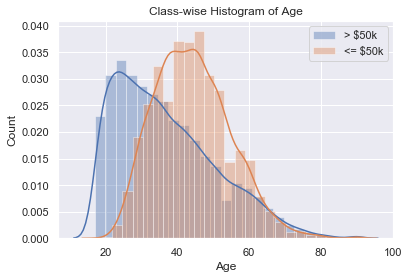

In [462]:
#first we create the figure using Matplotlib
fig,ax=plt.subplots()

#create two histograms using Seaborn:
sns.distplot(low_income.age, bins = 25, kde = True, label = "> $50k",ax=ax)
sns.distplot(high_income.age, bins = 25, kde = True, label = "<= $50k",ax=ax)

#Don't forget to make titles for the figure and axes
plt.title('Class-wise Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(loc="upper right")

Scatter (regression) Plots using Seaborn

In [463]:
var_a = 'education-num'
var_b = 'hours-per-week'

Text(0.5, 0.98, 'Scatter plot of education-num and hours-per-week')

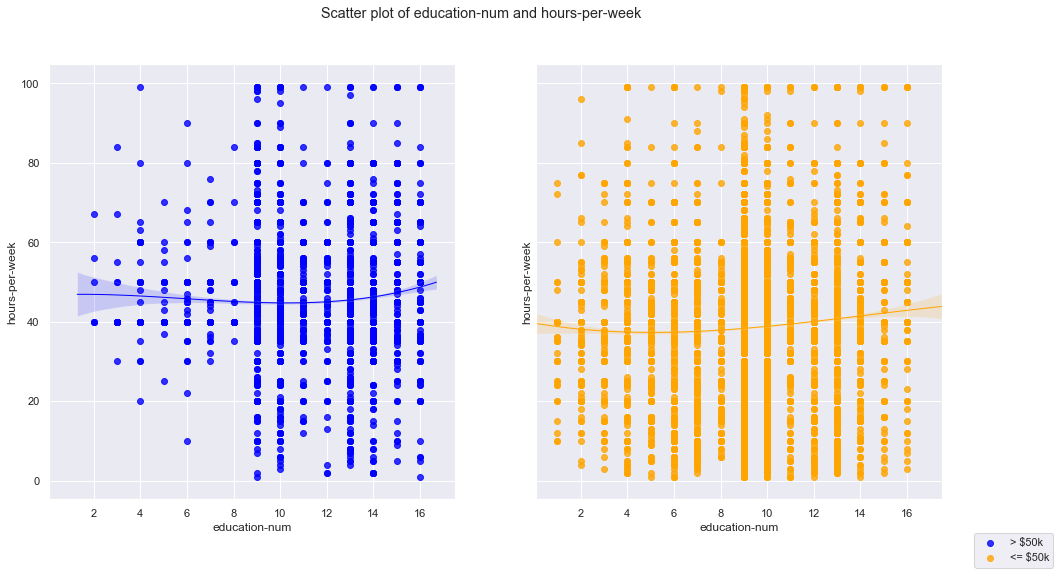

In [464]:
sns.set(color_codes=True)
fig,axes=plt.subplots(1,2,figsize=(16,8),sharex=True,sharey=True)
#train_data['education-num'] = train_data['education-num'].map(int)
sns.regplot(var_a, var_b, high_income,ax=axes[0], 
            scatter_kws={"marker": ".", "color": "blue"},
            line_kws = {"linewidth": "1", "color": "blue"},
            order = 3,
            label = '> $50k')
sns.regplot(var_a, var_b, low_income,ax=axes[1], 
            scatter_kws={"marker": ".", "color": "orange"},
            line_kws = {"linewidth": "1", "color": "orange"},
            order = 3,
            label = '<= $50k')
#axes[0].set_xlabel('Number of years of education')
#axes[1].set_xlabel('Number of years of education')
#axes[0].set_ylabel('Working Hours per week')
#axes[1].set_ylabel('Working Hours per week')
fig.legend(loc="lower right")
fig.suptitle(f"Scatter plot of {var_a} and {var_b}")

## Correlations

Computing correlations with Pandas


In [465]:
train_data.corr(method='spearman')

,age,observation-weight,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.078141,0.066345,0.124948,0.058484,0.142907
observation-weight,-0.078141,1.000000,-0.035706,-0.006039,-0.006914,-0.021621
education-num,0.066345,-0.035706,1.000000,0.119140,0.074749,0.167215
capital-gain,0.124948,-0.006039,0.119140,1.000000,-0.066569,0.093322
capital-loss,0.058484,-0.006914,0.074749,-0.066569,1.000000,0.059852
hours-per-week,0.142907,-0.021621,0.167215,0.093322,0.059852,1.000000


Visualize with a heatmap using Seaborn

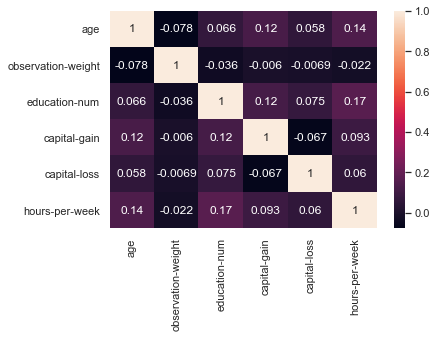

In [466]:
sns.heatmap(train_data.corr(method='spearman'),annot=True)

Feature-class correlation

In [467]:
class_num = train_data["class"].apply(lambda x: 0 if x == ' <=50K' else 1)
class_num.value_counts()

0    24720
1     7841
Name: class, dtype: int64

In [468]:
train_data.corrwith(class_num,method='spearman')

age                   0.272962
observation-weight   -0.010738
education-num         0.329682
capital-gain          0.278159
capital-loss          0.141042
hours-per-week        0.269075
dtype: float64

## 1.2 Data Cleaning

### Drop Unnecessary Column

In [469]:
train_data = train_data.drop('observation-weight', axis = 1)
test_data = test_data.drop('obervation-weight', axis = 1)

In [470]:
train_data.head(5)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Remove whitespaces

In [471]:
for variable in categorical_variables + binary_variables:
    if not pd.api.types.is_numeric_dtype(train_data[variable]):
        train_data[variable] = train_data[variable].apply(lambda x : x.strip())
        test_data[variable] = test_data[variable].apply(lambda x : x.strip())

### Type Conversion

Categorical variables to categorical data types

In [472]:
for variable in categorical_variables:
    train_data[variable] = train_data[variable].astype("category")
    test_data[variable] = test_data[variable].astype("category")

In [473]:
train_data[categorical_variables].describe()

,workclass,education,education-num,marital-status,occupation,relationship,race,sex,native-country
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,16,7,15,6,5,2,42
top,Private,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,22696,10501,10501,14976,4140,13193,27816,21790,29170


Numeric Variables to Float

In [474]:
for variable in numeric_variables:
    train_data[variable] = train_data[variable].astype(np.float)
    test_data[variable] = test_data[variable].astype(np.float)

Make the class boolean (True/False)

In [475]:
train_data["class"] = train_data["class"].apply(lambda x: False if x == '<=50K' else True)
test_data["class"] = test_data["class"].apply(lambda x: False if x == '<=50K' else True)

In [476]:
train_data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39.0,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,False
1,50.0,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,False
2,38.0,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,False
3,53.0,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,False
4,28.0,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,False


## Impute Missing Values

missing values are appearing as '?'
<br> First, we replace them with np.nan

In [477]:
train_data[train_data.workclass=='?'].head(2)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
27,54.0,?,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0.0,0.0,60.0,South,True
61,32.0,?,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0.0,0.0,40.0,?,False


In [478]:
for variable in train_data.columns:
    train_data[variable] = train_data[variable].replace('?', np.nan)

for variable in test_data.columns:
    test_data[variable] = test_data[variable].replace('?', np.nan)

In [479]:
np.sum(train_data.isna())

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
class                0
dtype: int64

Since all nulls are in categorical data, we replace them with the mode 

In [480]:
imputed_variables = ['workclass','occupation','native-country']
imputed_values = train_data[imputed_variables].mode()
print(imputed_values)

  workclass      occupation native-country
0   Private  Prof-specialty  United-States


In [522]:
for variable in imputed_variables:
    train_data[variable].fillna(value = imputed_values[variable][0], inplace=True)
    train_data[variable].cat.remove_unused_categories(inplace=True)
    
    test_data[variable].fillna(value = imputed_values[variable][0], inplace=True)
    test_data[variable].cat.remove_unused_categories(inplace=True)
    
    

In [524]:
train_data.head(5)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,hours-per-week_binned,age_binned,capital-gain_binned,capital-loss_binned
19051,47.0,Private,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0.0,0.0,40.0,United-States,False,35_40,46_50,-101_5000,-5_218
23928,50.0,Private,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,45.0,United-States,False,40_45,50_54,-101_5000,-5_218
21230,18.0,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Female,0.0,0.0,40.0,United-States,False,35_40,16_21,-101_5000,-5_218
19489,90.0,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,False,35_40,86_90,-101_5000,-5_218
8668,27.0,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States,True,35_40,24_28,-101_5000,-5_218


## 1.3. Data Wrangling & Feature engineering

### Randomly Shuffle Training Data
For some models, this is important

In [525]:
train_data = train_data.sample(frac = 1)

### Binning numeric values using Pandas' cut method

In [526]:
def binning(col,bin_num):
    #Define min and max values:
    minval = col.min()
    maxval = col.max()


    #Binning using cut function of pandas
    colBin = pd.cut(col,bin_num,include_lowest=True,precision=0)
    
    #Rename the categories after the interval
    colBin=colBin.cat.rename_categories([f'{int(colBin.left)}_{int(colBin.right)}' for colBin in colBin.cat.categories])
    
    return colBin

Binning example for the column "age"

In [527]:
age=train_data['age']
age_b=binning(age,20).head(10)

for age,age_bin in zip(age,age_b):
    print(f'value {age} is in bin {age_bin}') 

value 43.0 is in bin 43_46
value 34.0 is in bin 32_35
value 44.0 is in bin 43_46
value 52.0 is in bin 50_54
value 36.0 is in bin 35_39
value 60.0 is in bin 57_61
value 35.0 is in bin 32_35
value 23.0 is in bin 21_24
value 64.0 is in bin 61_64
value 42.0 is in bin 39_43


Binning all numeric variables

In [528]:
numeric_variables_binned = []
for variable in numeric_variables:
    binned_output_column = variable + "_binned"
    train_data[binned_output_column] = binning(train_data[variable],20)
    test_data[binned_output_column] = binning(test_data[variable],20)
    numeric_variables_binned.append(binned_output_column)
    
    

Note that the arbitrary division to 20 bins, is not always great:

In [529]:
train_data["capital-gain_binned"].value_counts()

-101_5000      30913
5000_10000       878
15000_20000      360
94999_99999      159
10000_15000      157
25000_30000       49
20000_25000       38
30000_35000        5
40000_45000        2
74999_79999        0
69999_74999        0
64999_69999        0
59999_64999        0
54999_59999        0
50000_54999        0
89999_94999        0
35000_40000        0
79999_84999        0
84999_89999        0
45000_50000        0
Name: capital-gain_binned, dtype: int64

In [530]:
train_data["capital-gain"].value_counts()

0.0        29849
15024.0      347
7688.0       284
7298.0       246
99999.0      159
           ...  
4931.0         1
7978.0         1
22040.0        1
2538.0         1
1111.0         1
Name: capital-gain, Length: 119, dtype: int64

## "One Hot" encoding using Pandas' get_dummies method:
Converting all categorical columns (and binned columns) into binary columns, where each column represents a single category

Example: 

In [531]:
train_data['relationship'].head()

20275    Not-in-family
8523     Not-in-family
14818          Husband
14405    Not-in-family
28812          Husband
Name: relationship, dtype: category
Categories (6, object): [Husband, Not-in-family, Other-relative, Own-child, Unmarried, Wife]

In [532]:
pd.get_dummies(train_data['relationship'],prefix='relationship').head()

,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
20275,0,1,0,0,0,0
8523,0,1,0,0,0,0
14818,1,0,0,0,0,0
14405,0,1,0,0,0,0
28812,1,0,0,0,0,0


Converting all columns to one hot:

In [533]:
#Encode all binned numeric columns and categorical columns with oneHot

#we leave the target feature as is
oh_train = train_data['class']
oh_test = test_data['class']

#now adding the one hot encoded data
for variable in numeric_variables_binned+categorical_variables:
    onehot_train_col = pd.get_dummies(train_data[variable],prefix=variable)
    oh_train = pd.concat([oh_train,onehot_train_col],axis=1)
    
    onehot_test_col = pd.get_dummies(test_data[variable],prefix=variable)
    oh_test = pd.concat([oh_test,onehot_test_col],axis=1)
    

In [534]:
oh_train.head()

,class,hours-per-week_binned_0_6,hours-per-week_binned_6_11,hours-per-week_binned_11_16,hours-per-week_binned_16_21,hours-per-week_binned_21_26,hours-per-week_binned_26_30,hours-per-week_binned_30_35,hours-per-week_binned_35_40,hours-per-week_binned_40_45,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
20275,False,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8523,False,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
14818,True,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14405,False,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
28812,True,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [535]:
oh_train.shape

(32561, 199)

#### Important: We need all columns to appear both in train and in test:

In [536]:
add_to_test = list(set(oh_train.columns) - set(oh_test.columns))

In [537]:
add_to_test

['native-country_Holand-Netherlands',
 'capital-loss_binned_2614_2831',
 'capital-loss_binned_1525_1742',
 'capital-loss_binned_3049_3267',
 'capital-loss_binned_1960_2178',
 'capital-loss_binned_436_653',
 'capital-loss_binned_3703_3920',
 'capital-loss_binned_4138_4356',
 'capital-loss_binned_2831_3049',
 'capital-loss_binned_3920_4138',
 'capital-loss_binned_871_1089',
 'capital-loss_binned_653_871',
 'capital-loss_binned_2396_2614',
 'capital-loss_binned_3267_3485',
 'capital-loss_binned_1742_1960',
 'capital-loss_binned_218_436',
 'capital-loss_binned_2178_2396',
 'capital-loss_binned_3485_3703',
 'capital-loss_binned_-5_218',
 'capital-loss_binned_1089_1307',
 'capital-loss_binned_1307_1525']

In [538]:
add_to_train = list(set(oh_test.columns) - set(oh_train.columns))

In [539]:
add_to_train

['capital-loss_binned_188_377',
 'capital-loss_binned_2450_2639',
 'capital-loss_binned_2639_2828',
 'capital-loss_binned_3204_3393',
 'capital-loss_binned_1696_1885',
 'capital-loss_binned_1508_1696',
 'capital-loss_binned_942_1131',
 'capital-loss_binned_377_566',
 'capital-loss_binned_2828_3016',
 'capital-loss_binned_1131_1320',
 'capital-loss_binned_1320_1508',
 'capital-loss_binned_-5_188',
 'capital-loss_binned_754_942',
 'capital-loss_binned_2074_2262',
 'capital-loss_binned_3393_3582',
 'capital-loss_binned_1885_2074',
 'capital-loss_binned_3016_3204',
 'capital-loss_binned_3582_3770',
 'capital-loss_binned_566_754',
 'capital-loss_binned_2262_2450']

In [540]:
for col in add_to_train:
    oh_train[col] = 0
for col in add_to_test:
    oh_test[col] = 0

Are they equal now?

In [541]:
set(oh_test.columns) == set(oh_train.columns)

True

Make the columns ordered the same way:

In [542]:
oh_test=oh_test[oh_train.columns]

# 2. Train the model: Logistic regression, Using SKLearn 

In [543]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression()



In [544]:
#separate labels from data
train_class = oh_train['class']
oh_train_data = oh_train.drop('class',axis=1)

In [545]:
#train the model:
logreg.fit(oh_train_data, train_class)
print(logreg)

/Users/amitsomech/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


# 3. Evaluate results

In [546]:
from sklearn import metrics

## Run the model on the test data

In [547]:
test_class = oh_test['class']
expected = test_class.values
oh_test_data= oh_test.drop('class',axis=1)


We need both the final prediction as well as the prediction probabilities

In [548]:
predicted = logreg.predict(oh_test_data)
predicted_probs = logreg.predict_proba(oh_test_data)

In [549]:
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

       False       0.93      0.84      0.88     12435
        True       0.61      0.79      0.69      3846

    accuracy                           0.83     16281
   macro avg       0.77      0.82      0.79     16281
weighted avg       0.85      0.83      0.84     16281



## Cross-validation
We do not want to rely on our arbitrary devision to train/test,
<br>So we can cross validate on the train data or on the combined train+test data

In [550]:
#scoring = None #accuracy will be used
#scoring = 'precision'
scoring = 'recall'

In [551]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, oh_train_data.append(oh_test_data), train_class.append(test_class), cv=5,scoring=scoring)

/Users/amitsomech/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/amitsomech/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/amitsomech/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/amitsomech/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/amitsomech/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarn

In [552]:
scores

array([0.62104363, 0.60179641, 0.61403509, 0.61617458, 0.60162602])

In [553]:
print(f"Mean {scoring}",": %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Mean recall : 0.61 (+/- 0.02)


## Evaluation Plots

In [554]:
import sklearn.metrics

In [555]:
y_true = expected
y_score = predicted_probs[:,1]

#### Precision-Recall Curve

In [556]:
def plotPR(precision, recall):
    plt.figure()
    plt.plot(recall, precision, label='PR curve')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall curve')
    plt.legend(loc='lower left')
    plt.show()


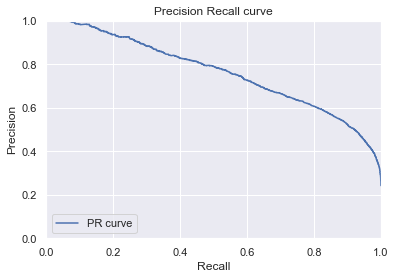

In [557]:
precision, recall, thresholds = sklearn.metrics.precision_recall_curve(y_true, y_score, pos_label=1)
plotPR(precision, recall)

#### ROC Curve

In [558]:
def plotRoc(fpr, tpr, auc):
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

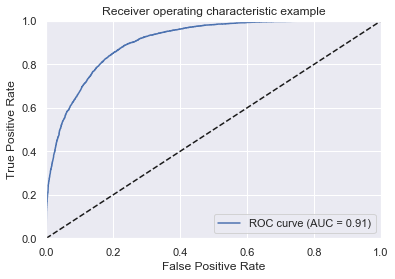

In [559]:
auc = sklearn.metrics.roc_auc_score(y_true, y_score)
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_true, y_score)
plotRoc(fpr, tpr, auc)

# 4. Model Analysis 

## Feature Importance

in our simple linear logistic regressions these are simply the coefficient learned for each feature

In [579]:
model = logreg

In [573]:
# get the feature importance from the model
importance = model.coef_[0]
# summarize feature importance
imp_dict = {oh_train_data.columns[i]:v for i,v in enumerate(importance)}
imp_df = pd.DataFrame.from_dict(imp_dict,orient='index',columns=['score'])

In [575]:
imp_df.score.sort_values(ascending=False)

capital-gain_binned_94999_99999     2.264597
capital-loss_binned_2396_2614       2.080157
capital-loss_binned_2614_2831       2.038622
marital-status_Married-AF-spouse    1.890021
capital-gain_binned_15000_20000     1.699297
                                      ...   
age_binned_21_24                   -1.368140
capital-loss_binned_1089_1307      -1.715950
capital-loss_binned_1525_1742      -1.977519
age_binned_16_21                   -2.174659
capital-gain_binned_-101_5000      -3.949953
Name: score, Length: 218, dtype: float64

## SHAP

In [599]:
import shap
shap.initjs()

In [614]:
def predict_fcn(x):
    return model.predict_proba(x)[:,1]

In [641]:
background_data = shap.maskers.Independent(oh_train_data, max_samples=100)
explainer = shap.Explainer(predict_fcn, background_data)

In [643]:
shap_values_100 = explainer(oh_test_data[:100])


Explaining a prediction of "False" (i.e., <50K)

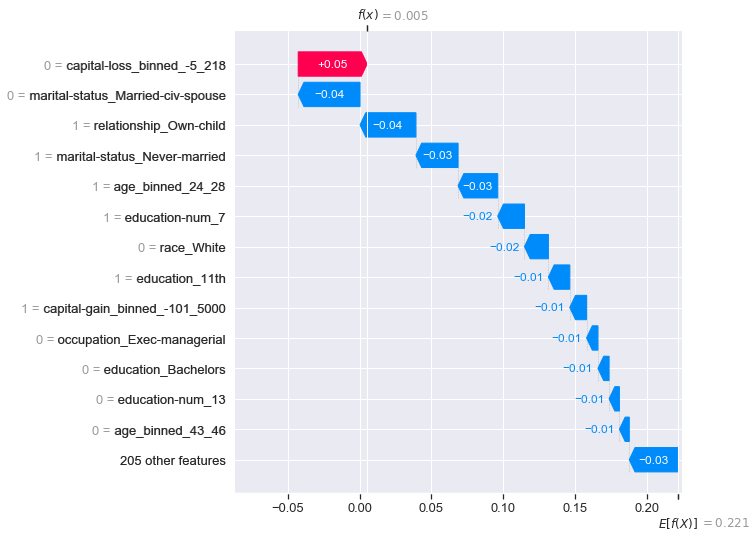

In [660]:
shap.plots.waterfall(shap_values_100[0], max_display=14)

Explaining a prediction of "True" (i.e., >50K)

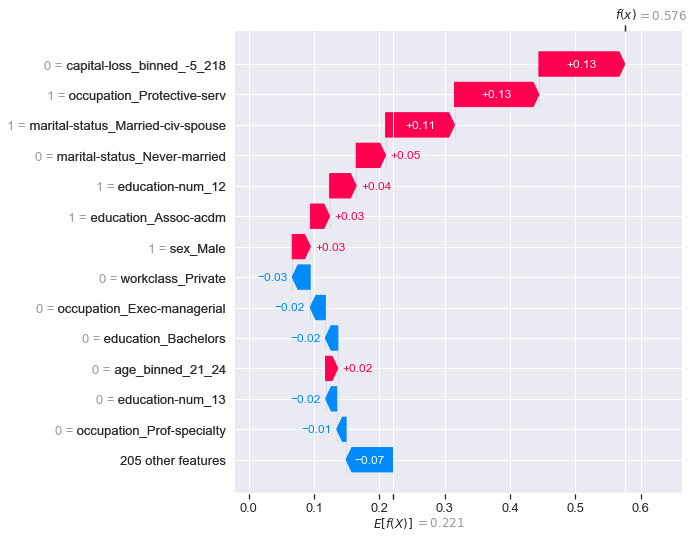

In [661]:
shap.plots.waterfall(shap_values_100[2], max_display=14)

Summary of Shap values for all features across our 100 first predictions

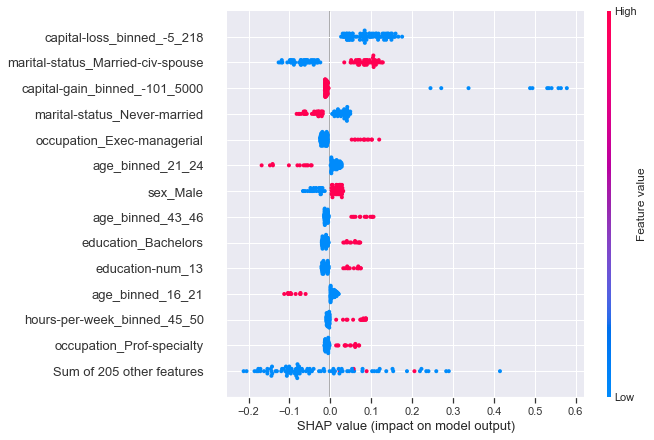

In [662]:
shap.plots.beeswarm(shap_values_100, max_display=14)